In [26]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from evclust.utils import plotting
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from evclust.utils import display_results_evidential, display_results_fuzzy_partition
from evclust.datasets import load_toys3c2d

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 600; Features: 2; Clusters: 2    3
dtype: int64
Instances 600 - Features 2 - Class 3
          0         1
0  0.840014 -0.865379
1  0.901840 -0.597634
2  0.114248 -0.282766
3  2.171705 -0.847531
4  1.099385  0.028547


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


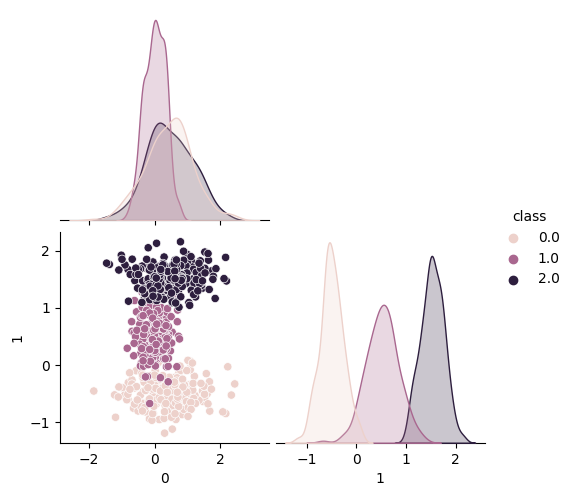

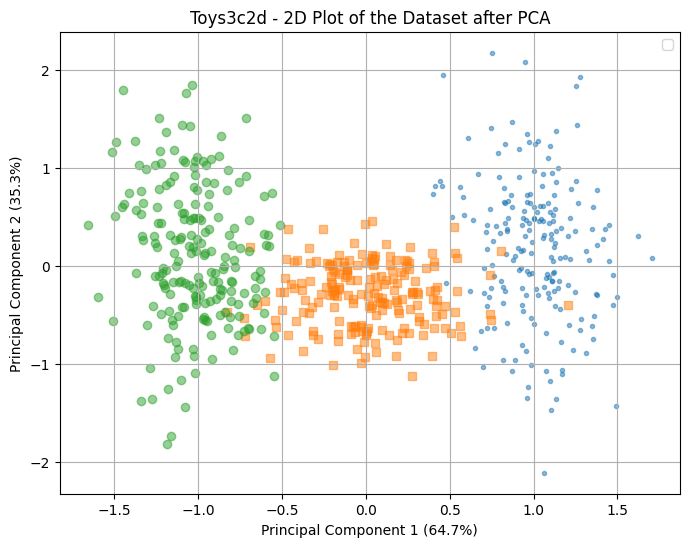

In [27]:
# fetch dataset 
df = load_toys3c2d()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 3

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")
plotting(X, y, "Toys3c2d", matrix_plot=True)

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

# Normalization
scaler = MinMaxScaler((0, 1))
X = pd.DataFrame(scaler.fit_transform(X))

# ECM

In [19]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [6.069530815641471, 6.071617437357114, 6.1262514286664, 6.128391749071898, 6.133720715933778, 6.139870256256507, 6.139935170400237, 6.1402345612285405, 6.227865089981416, 6.233137611701519]
ARI values: [0.4090555657825123, 0.431306422063561, 0.6004830849293524, 0.6233481459126333, 0.6200303693775631, 0.6410278917506528, 0.6410278917506528, 0.6410278917506528, 0.4736912781907339, 0.4276538466170598]
NS values: [1.7474471586739848, 1.7008840665467035, 1.709948916109857, 1.6474034685345442, 1.6710218592921704, 1.634247282831974, 1.6686392786305608, 1.6681057858861799, 1.535120980543373, 1.585402620452844]
NMI values: [0.49643766205337864, 0.5016177222329863, 0.5867160543866281, 0.6044233612003158, 0.5914446784047042, 0.606403811791394, 0.6064038117913941, 0.6064038117913941, 0.5293760999218675, 0.5012746731070952]


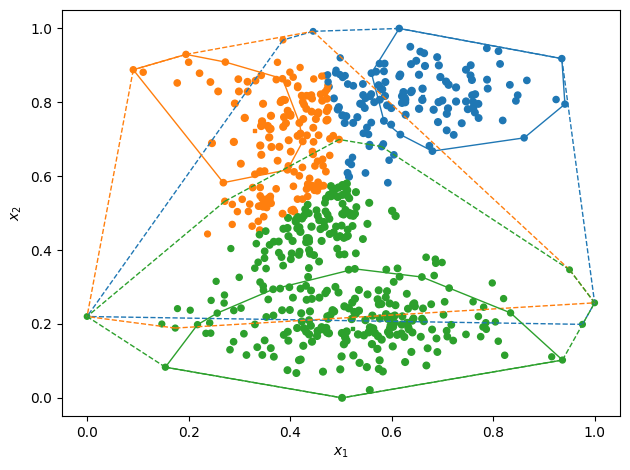

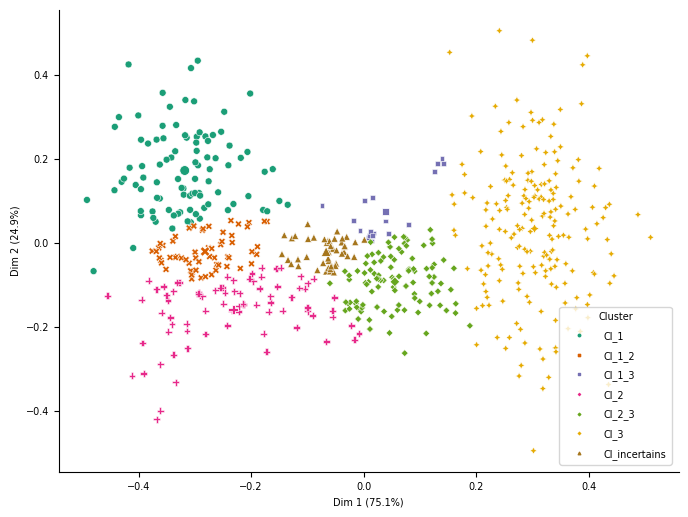

In [20]:

display_results_evidential(X, ecm_models, numeric_labels)

# WECM

In [30]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None", stopping_factor="center")
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [0.703234114329983, 0.7119862876152727, 0.729929170823745, 0.7299333498247589, 0.7299340688330612, 0.7303890397502016, 0.7440220928681927, 0.7508966520755542, 0.762662703076598, 0.7694978937497212]
ARI values: [0.07188525931344455, 0.06688371435348557, 0.7380690914587633, 0.7380690914587633, 0.7380690914587633, 0.7380690914587633, 0.6317917941035194, 0.47393475436064186, 0.39920498806684523, 0.5244226940934652]
NS values: [2.12422709345677, 2.128210927490529, 1.6694608179031065, 1.618041886278946, 1.6352007250784875, 1.6335460876149064, 1.7406910636732627, 1.4978586844667396, 1.4745253672697605, 1.5661484800720082]
NMI values: [0.06393518035208186, 0.058076276750267365, 0.7053108845752536, 0.7053108845752536, 0.7053108845752535, 0.7053108845752536, 0.6315571168552645, 0.46795700877751173, 0.4103662079198324, 0.527033085262989]


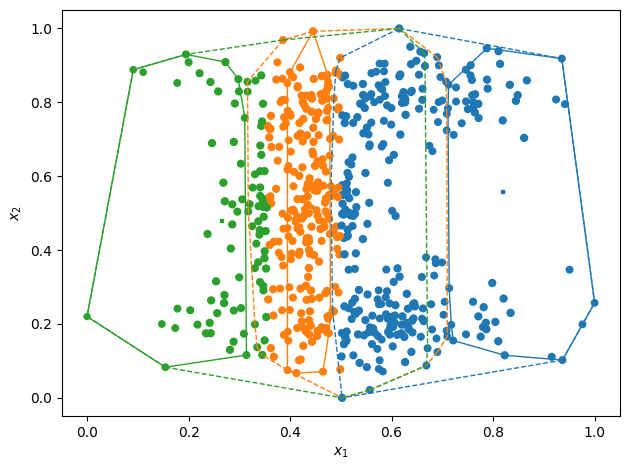

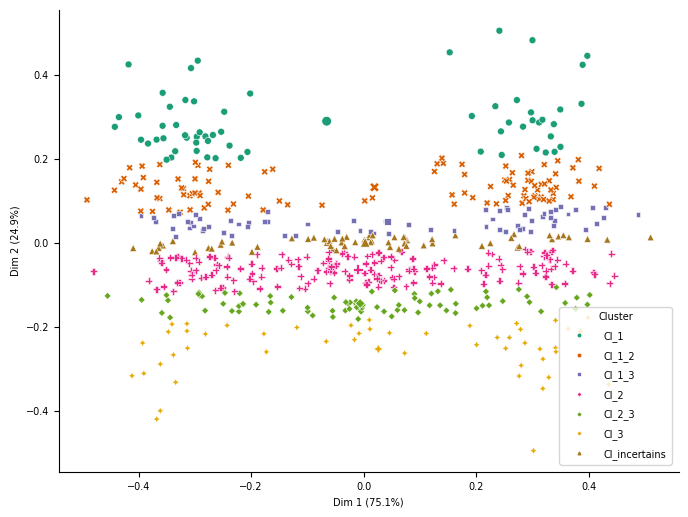

In [28]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [7]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True, epsilon=1e-6, init="None")
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [1.5990420562681984, 1.5990420658963076, 1.5990421101236416, 1.5990421446043546, 1.5990421860824662, 1.5990424212431815, 1.5990424864353572, 1.5990424922688897, 1.5990425186915402, 1.8241129214197167]
ARI values: [0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.7216497319025348, 0.04964359144911809]
NMI values: [0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.7089175085324015, 0.09777441273300796]


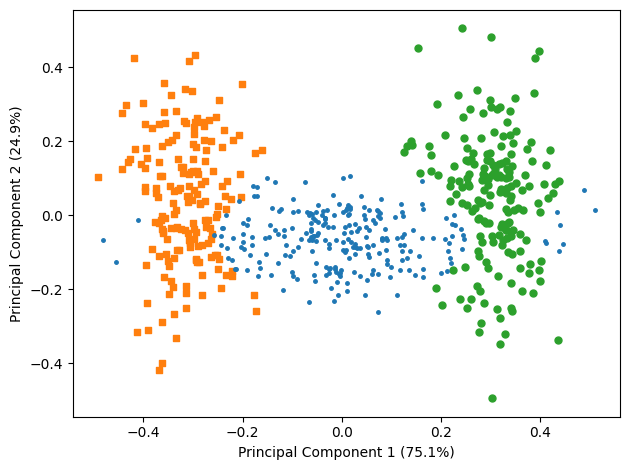

In [8]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# WFCM Wang2004

In [9]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=3.1, verbose=True, init="None")
    wang_models = np.append(wang_models, model)

J values: [2.526350437341222, 2.5262467070181773]
ARI values: [0.8847904558240312, 0.8802091363575055]
NMI values: [0.8404890179802031, 0.8353787498655124]


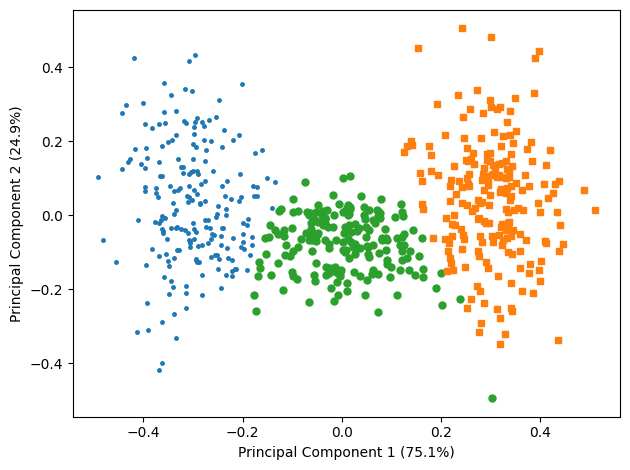

In [10]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

# SCAD1

In [11]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, init="None")
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])

J values: [14.413732397779876, 14.414159223209635, 14.414169563762993, 14.41421546427171, 14.414444513257497, 14.414562757108694, 14.415751161939992, 14.415988299782857, 14.41647381791444, 14.416896564245791]
ARI values: [0.8892097769449091, 0.8892097769449091, 0.8892097769449091, 0.8892097769449091, 0.8892097769449091, 0.8892097769449091, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697, 0.8939171584433697]
NMI values: [0.8437969408725347, 0.8437969408725349, 0.8437969408725349, 0.8437969408725348, 0.8437969408725347, 0.8437969408725347, 0.8498650944760283, 0.8498650944760283, 0.8498650944760284, 0.8498650944760283]


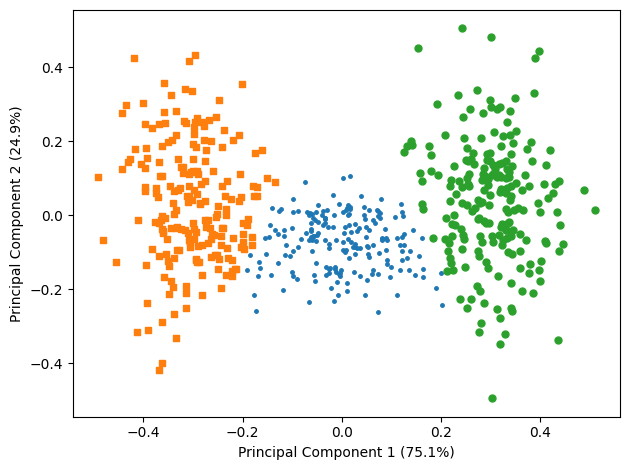

In [12]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [13]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, init="None")
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])

J values: [1.7480058686403113, 1.7490435151923598, 1.7497259305625605, 1.7508847728205092, 1.754339555520837, 1.754341874831078, 1.7546465557676758, 1.7547054950234897, 1.7553159404383845, 1.7558627997224672]
ARI values: [0.9219446194745345, 0.9219446194745345, 0.91256834307716, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813, 0.9172992053142813]
NMI values: [0.8827521037842924, 0.8827521037842923, 0.871658192746538, 0.8777359171635446, 0.8777359171635446, 0.8777359171635447, 0.8777359171635447, 0.8777359171635446, 0.8777359171635446, 0.8777359171635447]


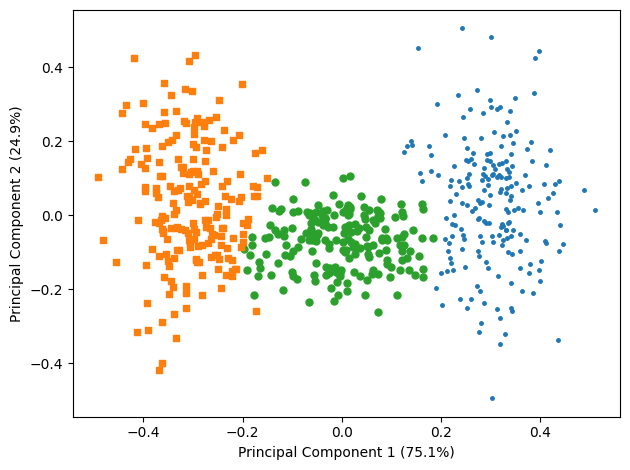

In [14]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [15]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True, init="None")
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [2.016080484072379, 2.016086006338418, 2.016095675366776, 2.0160998116679876, 2.0162316621007497, 2.016286224437427, 2.016305695828472, 2.016354854552646, 2.016435088571853, 2.0169039595478138]
ARI values: [0.04910421743242024, 0.04941330996619579, 0.04960552894958084, 0.04941330996619579, 0.04876000049091059, 0.04941330996619579, 0.05043109238330576, 0.05043109238330576, 0.048954766148800954, 0.04898976073845797]
NMI values: [0.09683944189316905, 0.097125512555702, 0.09762281250401314, 0.097125512555702, 0.09095007429338145, 0.097125512555702, 0.09873328994444057, 0.09873328994444057, 0.0962371025367135, 0.09614807789863179]


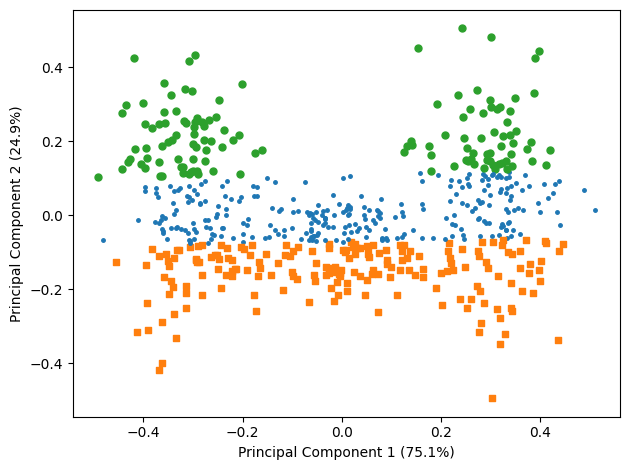

In [16]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [17]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True, epsilon=1e-6, init="None")
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [34.46131302697121, 34.46131332640533, 34.46131337494891, 34.461313527910285, 34.461313536642116, 34.461327211685116, 34.46132747579125, 34.461327491180754, 34.46132767542694, 34.46132791384164]
ARI values: [0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777, 0.05621512504173777]
NMI values: [0.09279659244630031, 0.09279659244630034, 0.09279659244630034, 0.09279659244630034, 0.09279659244630034, 0.09279659244630034, 0.09279659244630034, 0.09279659244630034, 0.09279659244630031, 0.09279659244630034]


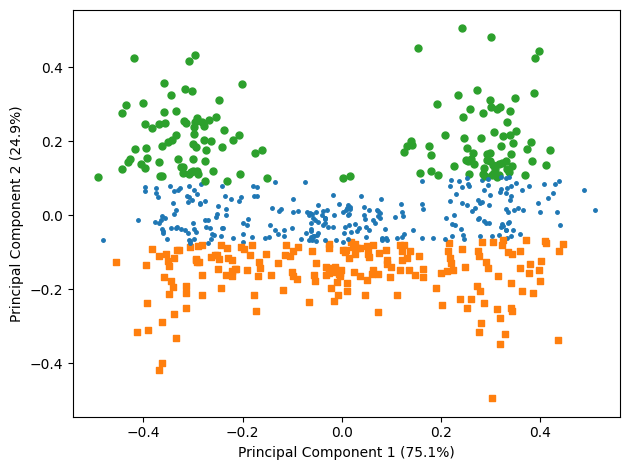

In [18]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)